In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

C:\Users\HOME\anaconda3\envs\AIML\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HOME\anaconda3\envs\AIML\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HOME\anaconda3\envs\AIML\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HOME\anaconda3\envs\AIML\lib\site-packages\tensorflow\python\framework

In [2]:
model = load_model("model1_2classes_7Jan2022.h5")

model2 = load_model("model1_80classes_07Jan2022.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [176]:
name_of_char = ['ก','ข','ฃ','ค','ต','ฆ','ง','จ',
                'ฉ','ช','ซ','ฌ','ญ','ฎ','ฏ','ฐ',
                'ฑ','ฒ','ณ','ด','ต','ถ','ท','ธ',
                'น','บ','ป','ผ','ฝ','พ','ฟ','ภ',
                'ม','ย','ร','ล','ว','ศ','ษ','ส',
                'ห','ฬ','อ','ฮ','อั','อั','อ็','อา',
                'อิ','อี','อึ','อื','อุ','อู','เอ','แอ',
                'ใอ','ไอ','โอ','ฤ','ฦ','อๅ','อ่','อ้',
                'อ๊','อ๋','อ์','ๆ','ฯ','อำ','๐','๑',
                '๒','๓','๔','๕','๖','๗','๘','๙']
IMG_SIZE = 28
allAns =[]
def pred(x,y,w,h,img_in):
    #cropped_image = img_in.crop((x,y,x+w,y+h)) addBorder(st,fn,cropped_image)
    img_in = addBorder(x,w,img_in)
    
    plt.imshow(img_in)
    plt.show()
    #print(np.array(cropped_image))
    #cropped_image = cropped_image.resize((IMG_SIZE, IMG_SIZE))
    
    
    #img = add_border(img, color="white") 
    #plt.imshow(img)
    #plt.show()
        
    #X = image.img_to_array(img)
    img = img_in
    X = image.img_to_array(img)
    #X = np.array(img)
    X = np.expand_dims(X/255,axis = 0)
    images = np.vstack([X])
    
    val = np.argmax(model2.predict(images))
    ans1 = name_of_char[val]
    #ans1 = str(val)
    print(ans1)
    return(ans1)
    #ans = str(val)
    
    
    
def addBorder(st,fn,cropped_image):
    copy_img = np.array(cropped_image)
    if st == 0:
        sp = 28-fn
        
    elif st != 0 :
        sp = st-1
        
    a = 0
    b = int(sp/2)
    c = int(sp/2) + (fn-st)   #11
    
    
    for j in range(a,b):
        for i in range(IMG_SIZE):
            copy_img[i][j] = 255
    
    for j in range(b,c):
        for i in range(IMG_SIZE):
            if np.array(cropped_image)[i][st] < 200:
                copy_img[i][j] = np.array(cropped_image)[i][st]
            else:
                copy_img[i][j] = 255
        st+=1
            
    for j in range(c,28):
        for i in range(IMG_SIZE):
            copy_img[i][j] = 255
    return(copy_img)


    
    
        

        
        
def sliding_window (cropped_image, image1,cutPosition):
    connect1_1 = [[],[]]
    for i in cutPosition:
        
        connect1_1[0].append(pred(0, 0, i, 28, cropped_image))
        connect1_1[1].append(pred(i, 0, 28, 28, cropped_image))
        cv2.rectangle(image1,(0,0), (i,28), (10+(i*20),15,15), 1)
    print(np.array(connect1_1))

    Ans = ""
    for j in range(len(connect1_1)):
        finalAns = [""]
        num = 0
        for i in range(len(connect1_1[j])):
            x = connect1_1[j].count(connect1_1[j][i])
            if x == num and connect1_1[j][i] != finalAns[0] :   
                finalAns.insert(0,connect1_1[j][i])
            elif x>num:
                finalAns = [connect1_1[j][i]]
                num=x
        Ans = Ans+ ","+ finalAns[0]

        print('\n Position', j+1, ":", finalAns)
    return(Ans)

In [178]:
def fineCutPosition(cropped_image):
    x = []
    for i in range(cropped_image.size[0]):
        po = 0
        for j in range(cropped_image.size[1]):
            pix = np.array(cropped_image)[j][i]

            if pix < 200:
                po +=1        
        x.append(po)


    mean = sum(x)/len(x)
    hx = []
    for a in range(8,19):
        if x[a] > mean :
            hx.append(a)
            hx.append(a+1)
            
            hx.append(a+2)
           
    return(hx)


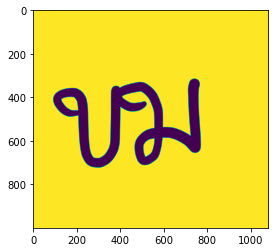

[11, 12, 10, 12, 13, 11, 15, 16, 14, 16, 17, 15, 17, 18, 16, 18, 19, 17]


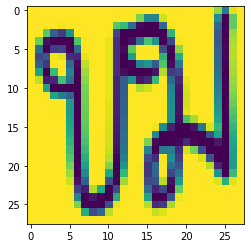

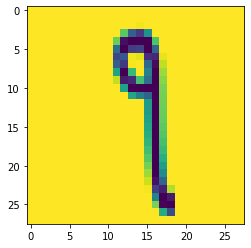

อุ


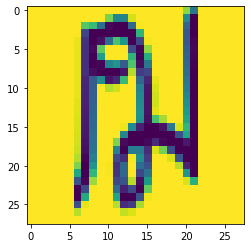

ฌ


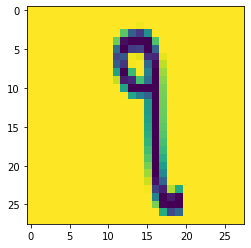

อุ


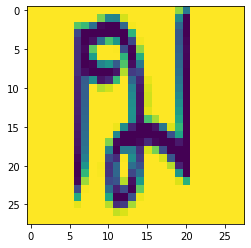

ฌ


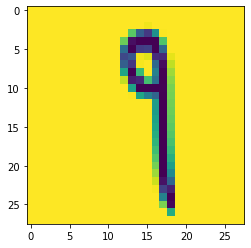

อๅ


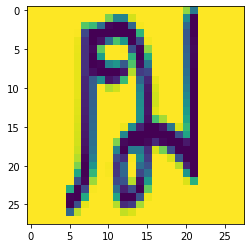

ฌ


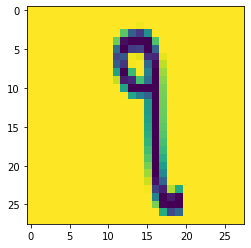

อุ


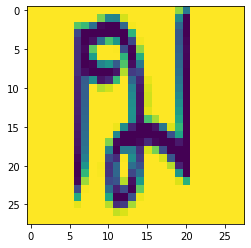

ฌ


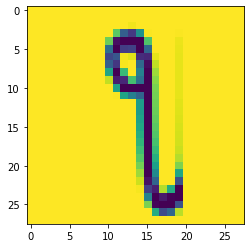

อุ


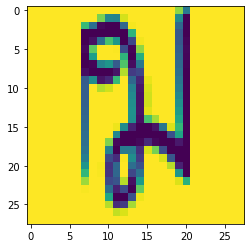

ฌ


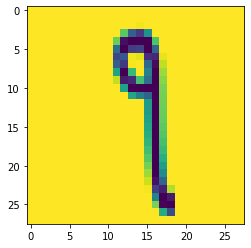

อุ


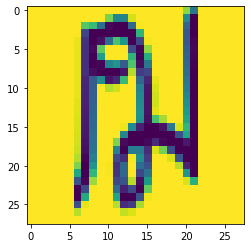

ฌ


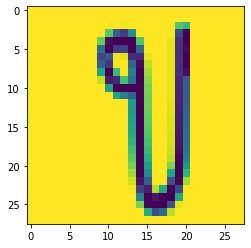

ข


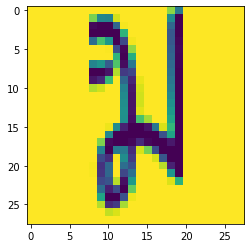

ม


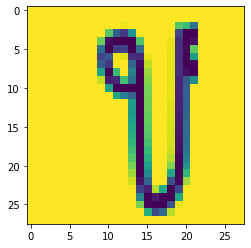

ข


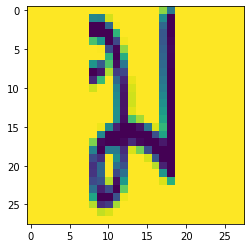

ม


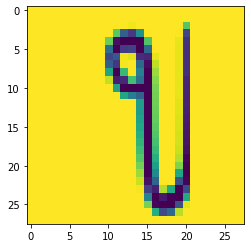

อา


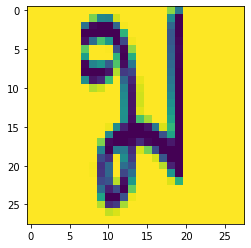

ม


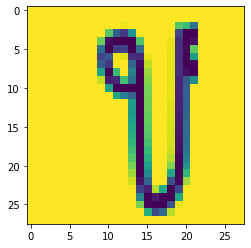

ข


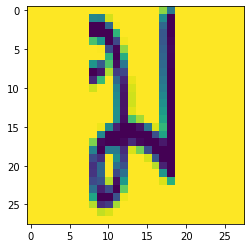

ม


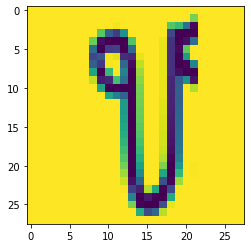

ข


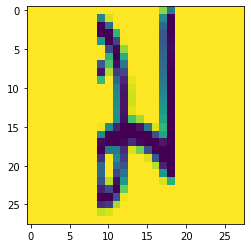

ม


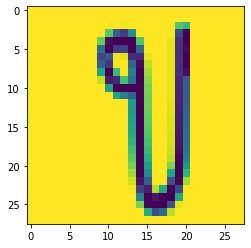

ข


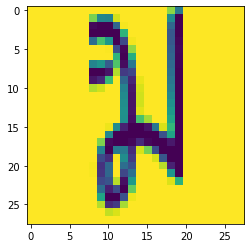

ม


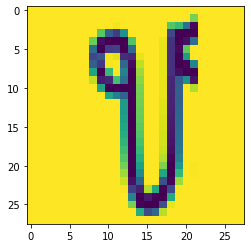

ข


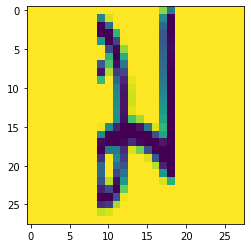

ม


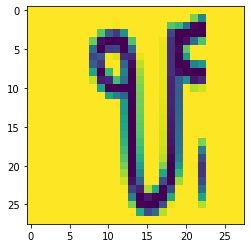

ข


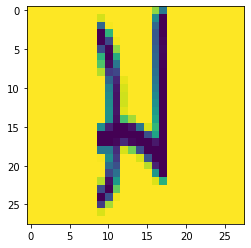

แอ


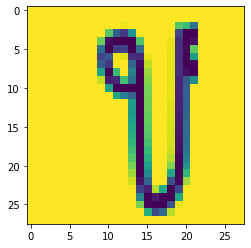

ข


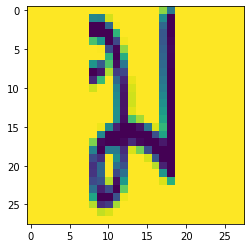

ม


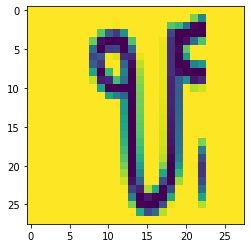

ข


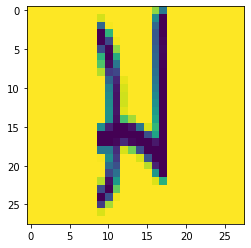

แอ


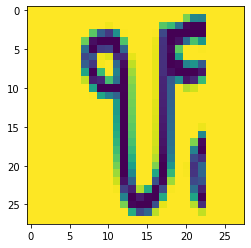

ห


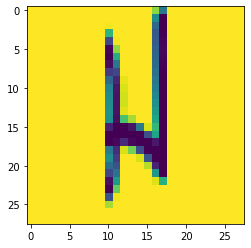

แอ


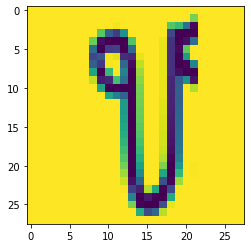

ข


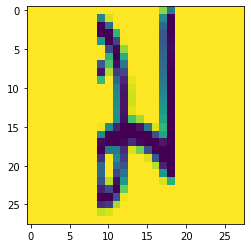

ม
[['อุ' 'อุ' 'อๅ' 'อุ' 'อุ' 'อุ' 'ข' 'ข' 'อา' 'ข' 'ข' 'ข' 'ข' 'ข' 'ข' 'ข'
  'ห' 'ข']
 ['ฌ' 'ฌ' 'ฌ' 'ฌ' 'ฌ' 'ฌ' 'ม' 'ม' 'ม' 'ม' 'ม' 'ม' 'ม' 'แอ' 'ม' 'แอ' 'แอ'
  'ม']]

 Position 1 : ['ข']

 Position 2 : ['ม']


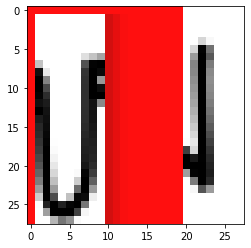

In [166]:
path = "Pictures/202.jpg"   # 8 11 12 14
image1 = cv2.imread(path)  #4
image1 = image1[230:730,180:870]
dim = (28, 28)
image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA)


img_in1 = image.load_img(path , color_mode='grayscale')
plt.imshow(img_in1)
plt.show()
img_in = img_in1.crop((60,310,810,740))

div1 = img_in.size[0]/28
div2 = img_in.size[1]/28

cropped_image = img_in.resize((int(img_in.size[0]/div1), int(img_in.size[1]/div2)))
cutPosition = fineCutPosition(cropped_image)
print(cutPosition)
plt.imshow(cropped_image)
plt.show()



sliding_window (cropped_image,image1,cutPosition)

plt.imshow(image1)
plt.show()

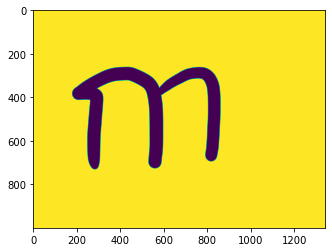

[14, 15, 16, 15, 16, 17, 16, 17, 18]


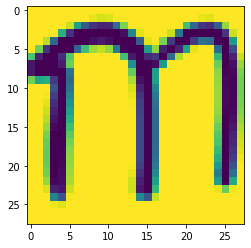

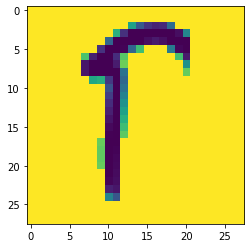

ก


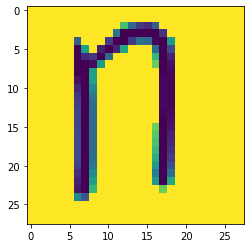

ก


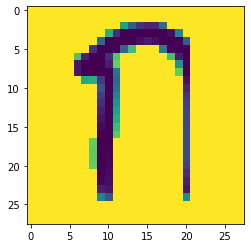

ก


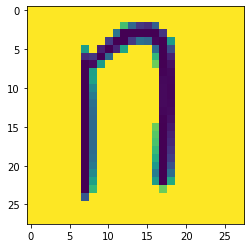

ก


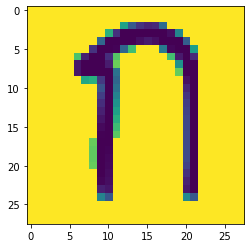

ก


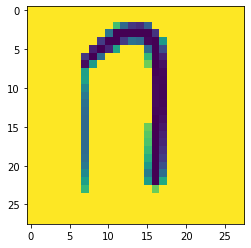

ญ


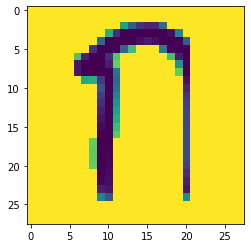

ก


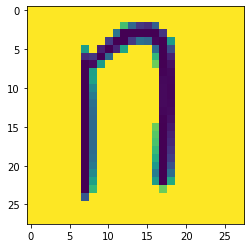

ก


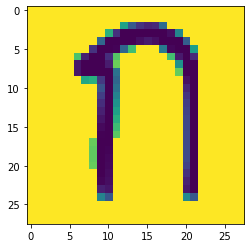

ก


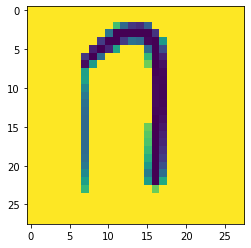

ญ


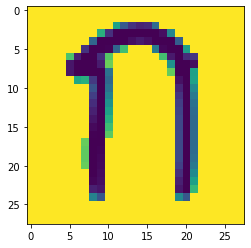

ก


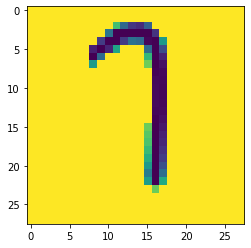

อา


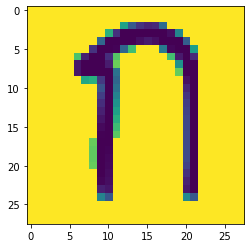

ก


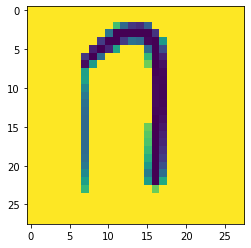

ญ


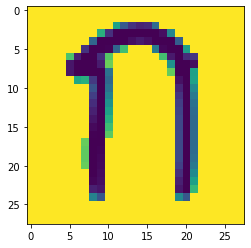

ก


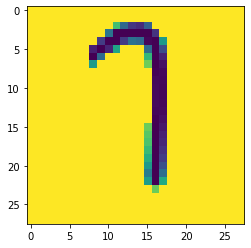

อา


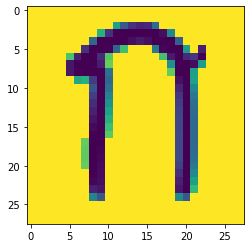

ก


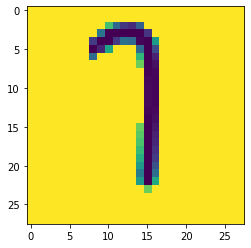

อา
[['ก' 'ก' 'ก' 'ก' 'ก' 'ก' 'ก' 'ก' 'ก']
 ['ก' 'ก' 'ญ' 'ก' 'ญ' 'อา' 'ญ' 'อา' 'อา']]

 Position 1 : ['ก']

 Position 2 : ['อา', 'ญ', 'อา', 'ญ', 'ก', 'ญ', 'ก']


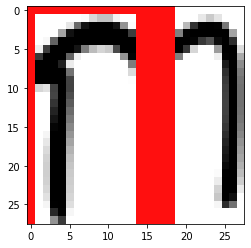

In [179]:
path = "Pictures/204.jpg"   # 8 11 12 14
image1 = cv2.imread(path)  #4
image1 = image1[230:730,180:870]
dim = (28, 28)
image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA)


img_in1 = image.load_img(path , color_mode='grayscale')
plt.imshow(img_in1)
plt.show()
img_in = img_in1.crop((180,220,880,790))
#img_in = img_in1.crop((575,290,1200,820))


cropped_image = img_in.resize((28, 28))
cutPosition = fineCutPosition(cropped_image)
print(cutPosition)
plt.imshow(cropped_image)
plt.show()



sliding_window (cropped_image,image1,cutPosition)

plt.imshow(image1)
plt.show()

In [ ]:
div1 = img_in.size[0]/28
div2 = img_in.size[1]/28

cropped_image = img_in.resize((int(img_in.size[0]/div1), int(img_in.size[1]/div2)))
plt.imshow(cropped_image)
plt.show()



x = []
for i in range(cropped_image.size[1]):
    po = 0
    for j in range(cropped_image.size[0]):
        pix = np.array(cropped_image)[j][i]
        
        if pix < 200:
            po +=1        
    x.append(po)
    



'''
plt.plot([c for c in range(28)], x, 'ro')
plt.axis([0, 28, 0, 28])
plt.show()

'''

mean = sum(x)/len(x)
hx = []
for a in range(6,20):
    if x[a] > mean :
        hx.append(a)
print(x)

print(hx)
print(sum(x)/len(x), sum(x),len(x))


In [49]:
from PIL import Image, ImageOps
IMG_SIZE = 28
name_of_char = ['single 1','connect 2']
def add_border(input_image, color):
    img = input_image
    x,y,_ = img.shape
    #print(x,y)
    if x>y :
        border_x = int(x/15)
        border_y = int(((x+2*border_x)-y)/2)
    elif y>x :
        border_y = int(y/15)
        border_x = int(((y+2*border_y)-x)/2)
    else:
        border_x = int(x/15)
        border_y = int(y/15)
    
    #print(x,y,border_x,border_y)
    img = Image.fromarray(img)
    border = (border_y, border_x, border_y, border_x)

    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border, fill=color)
        bimg = bimg.resize((IMG_SIZE, IMG_SIZE))
    else:
        raise runtimeerror('border is not an integer or tuple!')
    return(bimg)


[[ 20 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 229 154 249 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 210 132 130 242
  255 255 255 255 255 255 128   0 196 255]
 [255 255 255 254 242 255 255 255 255 255 255 183 164  92   8   0   0  82
  250 255 255 255 255 255  85   0 193 255]
 [255 255 164  57  29 107 250 255 255 255 253  51   0   0   0  10   6   0
  153 255 255 255 255 255  69   0 218 255]
 [255 173   0   0   0   0 162 255 255 255 247  36   0  43 142 217 172   4
   39 246 255 255 255 255  72   4 225 255]
 [255  74  17 114 116   3  63 254 255 255 246  34   6 212 255 255 255  95
    0 197 255 255 255 255  79   5 227 255]
 [255  57  73 255 255  57  18 240 255 255 246  35   0  73 230 244 206 182
    0 135 255 255 255 255  85   4 226 255]
 [255 108  11 225 255  99   2 224 255 255 246  35   0   0  25  3

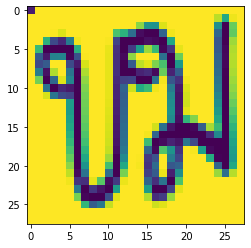

In [87]:
a = np.array(cropped_image)

a[0][0]= 20
print(a)
plt.imshow(a)
plt.show()

In [82]:
np.array(cropped_image)

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 229, 154,
        249, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 210, 132, 130, 242, 255, 255, 255, 255, 255, 255, 128,   0,
        196, 255],
       [255, 255, 255, 254, 242, 255, 255, 255, 255, 255, 255, 183, 164,
         92,   8,   0,   0,  82, 250, 255, 255, 255, 255, 255,  85,   0,
        193, 255],
       [255, 255, 164,  57,  29, 107, 250, 255, 255, 255, 253,  51,   0,
          0,   0,  10,   6,   0, 153, 255, 255, 255, 255, 255,  69,   0,
        218, 255],
       [255, 173,   0,   0,   0,   0, 162, 255, 255, 255, 247,  36,   0,
         43, 142, 217, 172,   4,  39, 246, 255, 255, 255, 255,  72,   4,
        225, 255],
       [25

In [126]:
int(2.9)

2